In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import scipy.integrate as int
import matplotlib as mpl

from sympy import solve
from sympy.abc import x, y, z

mpl.rcParams['figure.figsize'] = (10,7)

# Hollik-Tanner Differential Equations

Based on Lynch, Stephen. Dynamical systems with applications using python. Basel, Switzerland: Birkhäuser, 2018.

$$
\begin{align}
x' &= x \left( 1- \frac{x}{7} \right) - \frac{6xy}{7+7x} \\
y' &= 0.2y \left( 1 - \frac{Ny}{x} \right)
\end{align}
$$

In [6]:
N = 0.5

In [7]:
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ X[0]*(1-X[0]/7) -   6*X[0]*X[1]/(7 + 7*X[0]) ,
                      0.2*X[1] * (1 - N*X[1]/X[0]) ])

In [10]:
t  = np.linspace(0, 50, 1000)
y0 = [2. , 4.]

X, infodict = int.odeint(dX_dt, y0, t, full_output=True)
infodict['message']

'Integration successful.'

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

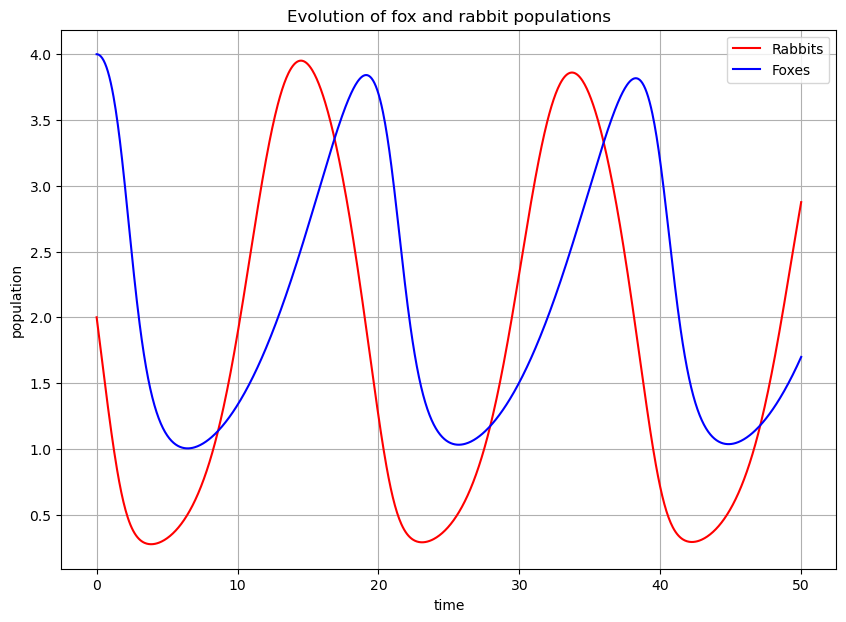

In [11]:
rabbits, foxes = X.T

plt.plot(t, rabbits, 'r-', label='Rabbits')
plt.plot(t, foxes  , 'b-', label='Foxes')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

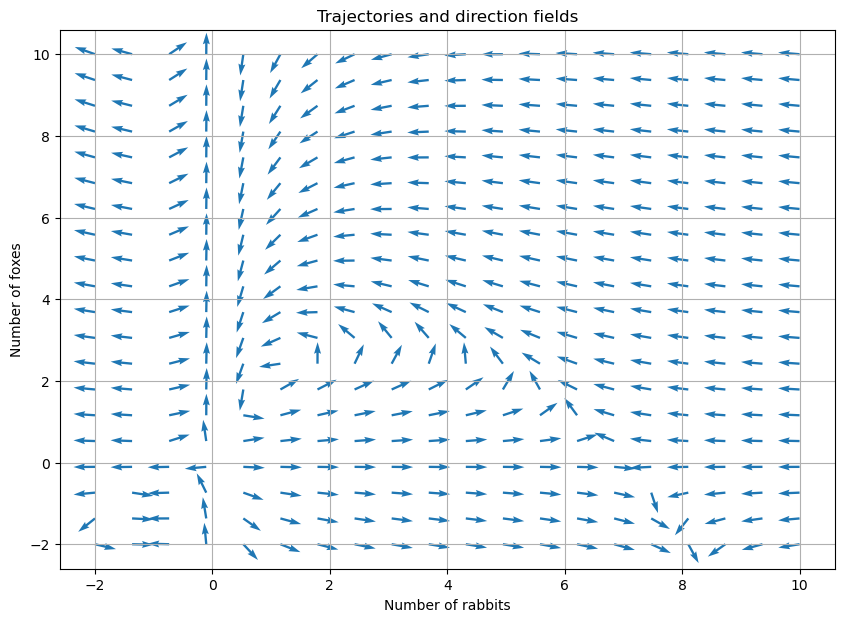

In [13]:
x = np.linspace(-2, 10, 20)
y = np.linspace(-2, 10, 20)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, color="C0")
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.grid()

A staionary point is where `dX_dt = 0`. Let's calculate this from the model.

In [18]:
solve([x*(1-x/7) - 6*x*y/(7+7*x), 0.2*y*(1-N*y/x)], dict=True)

[{x: -7.00000000000000, y: -14.0000000000000},
 {x: 1.00000000000000, y: 2.00000000000000},
 {x: 7.00000000000000, y: 0.0}]

It can shown (how?) that there is an isolated periodic trajectory is known as a stable limit cycle around the fixed point $(1,2)$. 

All trajectories lying in the first quadrant are drawn to this stable limit cycle. Therefore, no matter what the initial values of $x, y$, the populations eventually rise and fall periodically. This  In the long term, all trajectories in the first quadrant are drawn to this
periodic cycle, and once there, remain there forever.

Let's try this out: We solve the ODE system for two different initial conditions and show what happens to the populations in the long run.

In [21]:
t  = np.linspace(0, 100, 1000)

y0_1 = [2. , 4.]
X1, infodict = int.odeint(dX_dt, y0_1, t, full_output=True)

y0_2 = [4. , 1.]
X2, infodict = int.odeint(dX_dt, y0_2, t, full_output=True)

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

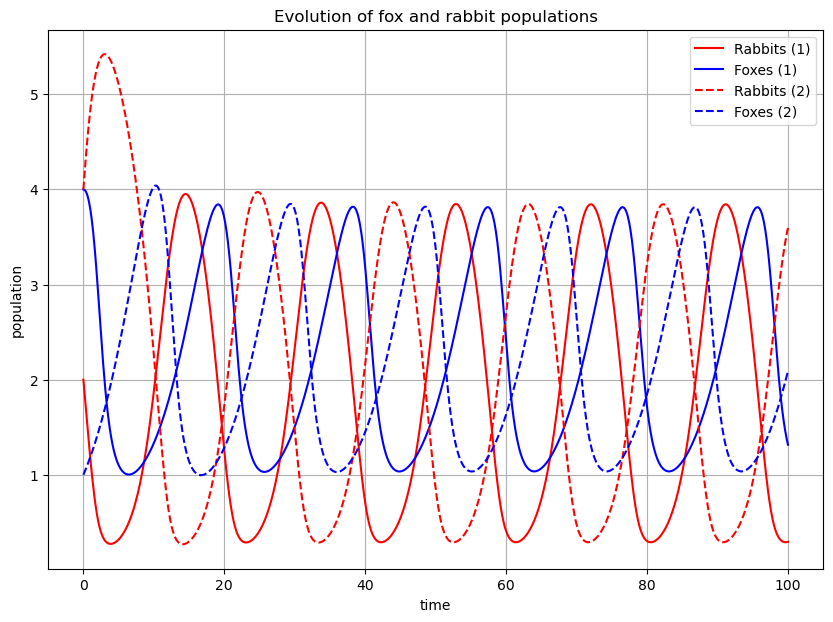

In [22]:
rabbits1, foxes1 = X1.T

plt.plot(t, rabbits1, 'r-', label='Rabbits (1)')
plt.plot(t, foxes1 , 'b-', label='Foxes (1)')

rabbits2, foxes2 = X2.T

plt.plot(t, rabbits2, 'r--', label='Rabbits (2)')
plt.plot(t, foxes2 , 'b--', label='Foxes (2)')


plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

We can see that after some initial difference, the solution pairs oscillate with the same amplitude and period (different that the Lotka-Volterra solutions) as claimed above.